# Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

# Load the Dataset

In [2]:
#Reading file and copying data from the file.
data=pd.read_csv(r"C:\Users\Dlc\Downloads\clean_dataset.csv",header=0)

#creating backup file.
data_bk=data.copy()

#displaying first 5 records in the file.
data.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [3]:
#displaying information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


# Check the null values

In [4]:
data.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [5]:
#diaplay program_duration categorical variable
data['Citizen'].value_counts()


ByBirth         625
ByOtherMeans     57
Temporary         8
Name: Citizen, dtype: int64

In [6]:
#displaying columns present in the data.
data.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'Industry',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved'],
      dtype='object')

# converting categorical data into numerical ones

In [7]:
 
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
data['Industry']=LE.fit_transform(data['Industry'])
data['Industry'].value_counts()

4     146
9      78
7      64
1      59
2      54
6      53
5      51
8      41
0      38
13     38
10     30
3      25
11     10
12      3
Name: Industry, dtype: int64

In [8]:
data['Ethnicity']=LE.fit_transform(data['Ethnicity'])
data['Ethnicity'].value_counts()

4    408
1    138
0     59
2     57
3     28
Name: Ethnicity, dtype: int64

In [9]:
data['Citizen']=LE.fit_transform(data['Citizen'])
data['Citizen'].value_counts()

0    625
1     57
2      8
Name: Citizen, dtype: int64

In [10]:
#conerting datatypes
data['Age']=data['Age'].astype(int)
data['YearsEmployed']=data['YearsEmployed'].astype(int)
data['Debt']=data['Debt'].astype(int)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Gender          690 non-null    int64
 1   Age             690 non-null    int32
 2   Debt            690 non-null    int32
 3   Married         690 non-null    int64
 4   BankCustomer    690 non-null    int64
 5   Industry        690 non-null    int32
 6   Ethnicity       690 non-null    int32
 7   YearsEmployed   690 non-null    int32
 8   PriorDefault    690 non-null    int64
 9   Employed        690 non-null    int64
 10  CreditScore     690 non-null    int64
 11  DriversLicense  690 non-null    int64
 12  Citizen         690 non-null    int32
 13  ZipCode         690 non-null    int64
 14  Income          690 non-null    int64
 15  Approved        690 non-null    int64
dtypes: int32(6), int64(10)
memory usage: 70.2 KB


In [12]:
#checking for duplicates
data1=data[data.duplicated(keep='last')]
data1

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
280,1,21,0,0,0,4,1,0,0,0,0,0,0,280,204,0


In [13]:
#deleteing duplicates
data=data.drop_duplicates()

In [14]:
#reset index of dataset
data.reset_index(inplace=True)

# checking the data balanced or not

In [15]:
left_count=data.Approved.value_counts()
print('class 0:',left_count[0])
print('class 1:',left_count[1])
print('Proportion:',round(left_count[0]/left_count[1],2),':1')
print('Total Loans Trans:',len(data))

class 0: 382
class 1: 307
Proportion: 1.24 :1
Total Loans Trans: 689


# Define the Dependent and Indepented variables

In [16]:
indepvar=[]
for col in data.columns:
    if col!='Approved':
        indepvar.append(col)
targetvar='Approved'
x=data[indepvar]
y=data[targetvar]

In [17]:
#splittind data into train and test
from  sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((482, 16), (207, 16), (482,), (207,))

In [18]:
#scaling technique
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train= mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test= mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [19]:
#Defining EMResults file
EMResults = pd.read_csv(r"C:\Users\Dlc\Downloads\EMResults.csv")
EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# Built the algorithm and compare

Model Name:  LogisticRegression()
Confusion matrix : 
 [[87  8]
 [25 87]]
Outcome values : 
 87 8 25 87
Classification report : 
               precision    recall  f1-score   support

           1       0.78      0.92      0.84        95
           0       0.92      0.78      0.84       112

    accuracy                           0.84       207
   macro avg       0.85      0.85      0.84       207
weighted avg       0.85      0.84      0.84       207

Accuracy : 84.1 %
Precision : 77.7 %
Recall : 91.6 %
F1 Score : 0.841
Specificity or True Negative Rate : 77.7 %
Balanced Accuracy : 84.6 %
MCC : 0.693
roc_auc_score: 0.846


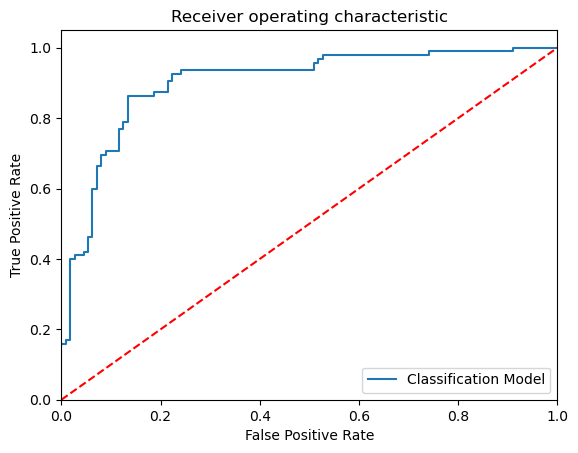

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 87   8]
 [  8 104]]
Outcome values : 
 87 8 8 104
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.92      0.92        95
           0       0.93      0.93      0.93       112

    accuracy                           0.92       207
   macro avg       0.92      0.92      0.92       207
weighted avg       0.92      0.92      0.92       207

Accuracy : 92.3 %
Precision : 91.6 %
Recall : 91.6 %
F1 Score : 0.916
Specificity or True Negative Rate : 92.9 %
Balanced Accuracy : 92.3 %
MCC : 0.844
roc_auc_score: 0.922


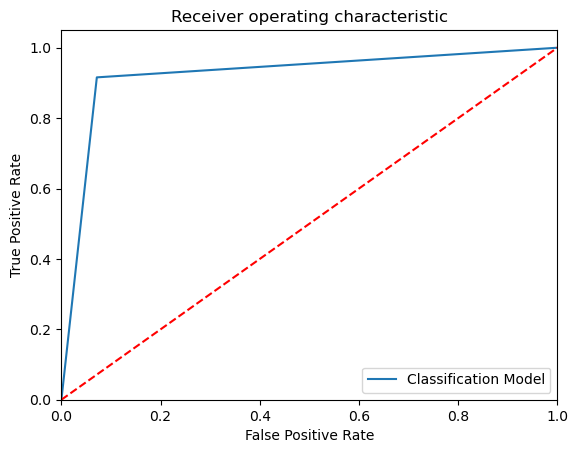

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 88   7]
 [ 11 101]]
Outcome values : 
 88 7 11 101
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.93      0.91        95
           0       0.94      0.90      0.92       112

    accuracy                           0.91       207
   macro avg       0.91      0.91      0.91       207
weighted avg       0.91      0.91      0.91       207

Accuracy : 91.3 %
Precision : 88.9 %
Recall : 92.6 %
F1 Score : 0.907
Specificity or True Negative Rate : 90.2 %
Balanced Accuracy : 91.4 %
MCC : 0.826
roc_auc_score: 0.914


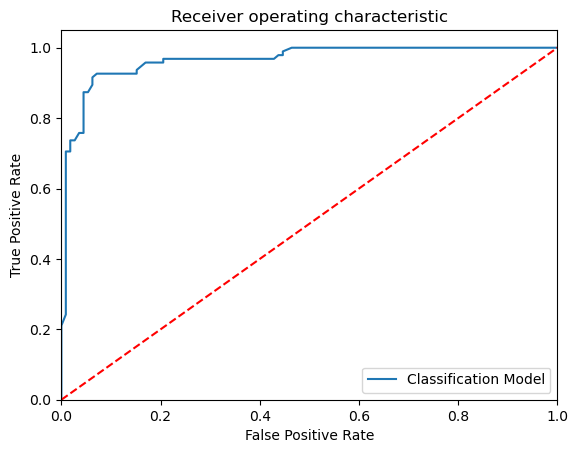

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[88  7]
 [15 97]]
Outcome values : 
 88 7 15 97
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.93      0.89        95
           0       0.93      0.87      0.90       112

    accuracy                           0.89       207
   macro avg       0.89      0.90      0.89       207
weighted avg       0.90      0.89      0.89       207

Accuracy : 89.4 %
Precision : 85.4 %
Recall : 92.6 %
F1 Score : 0.889
Specificity or True Negative Rate : 86.6 %
Balanced Accuracy : 89.6 %
MCC : 0.79
roc_auc_score: 0.896


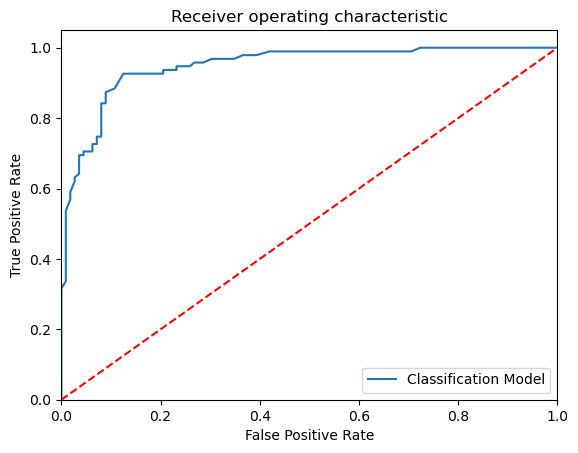

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[81 14]
 [22 90]]
Outcome values : 
 81 14 22 90
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.85      0.82        95
           0       0.87      0.80      0.83       112

    accuracy                           0.83       207
   macro avg       0.83      0.83      0.83       207
weighted avg       0.83      0.83      0.83       207

Accuracy : 82.6 %
Precision : 78.6 %
Recall : 85.3 %
F1 Score : 0.818
Specificity or True Negative Rate : 80.4 %
Balanced Accuracy : 82.8 %
MCC : 0.654
roc_auc_score: 0.828


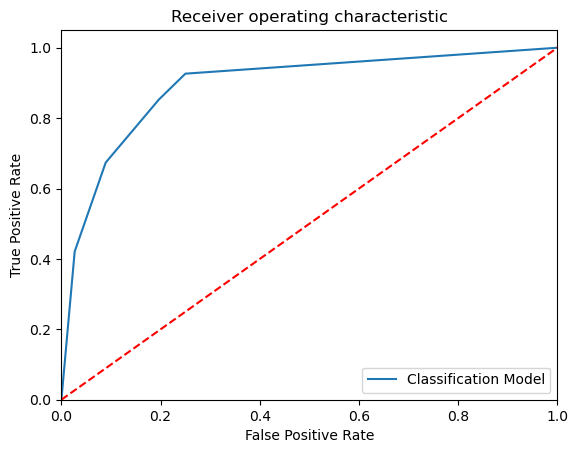

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[68 27]
 [13 99]]
Outcome values : 
 68 27 13 99
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.72      0.77        95
           0       0.79      0.88      0.83       112

    accuracy                           0.81       207
   macro avg       0.81      0.80      0.80       207
weighted avg       0.81      0.81      0.80       207

Accuracy : 80.7 %
Precision : 84.0 %
Recall : 71.6 %
F1 Score : 0.773
Specificity or True Negative Rate : 88.4 %
Balanced Accuracy : 80.0 %
MCC : 0.612
roc_auc_score: 0.8


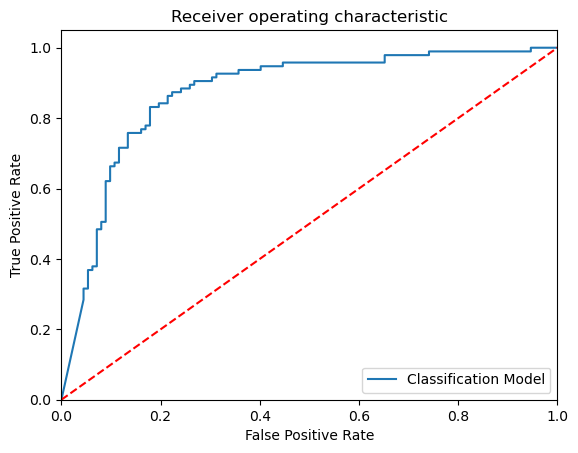

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[88  7]
 [25 87]]
Outcome values : 
 88 7 25 87
Classification report : 
               precision    recall  f1-score   support

           1       0.78      0.93      0.85        95
           0       0.93      0.78      0.84       112

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.86      0.85      0.85       207

Accuracy : 84.5 %
Precision : 77.9 %
Recall : 92.6 %
F1 Score : 0.846
Specificity or True Negative Rate : 77.7 %
Balanced Accuracy : 85.2 %
MCC : 0.704
roc_auc_score: 0.852


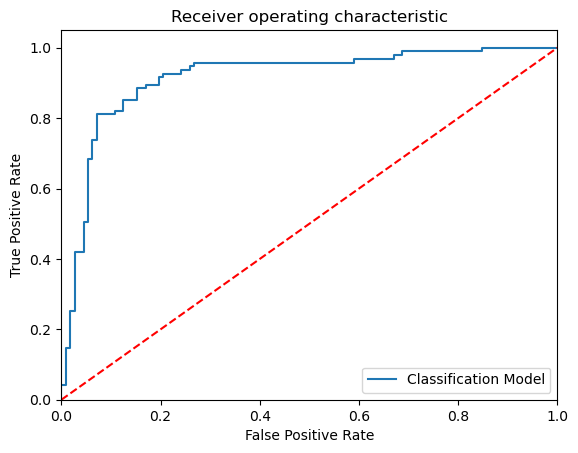

-----------------------------------------------------------------------------------------------------


In [24]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Create objects of classification algorithms with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelGNB = GaussianNB()
ModelSVM = SVC(probability=True)

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM]
#MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN]
for models in MM:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------
#======================================================================================================================>


In [26]:
EMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),87,8,25,87,0.841,0.777,0.916,0.841,0.777,0.693,0.846288,0.846
1,DecisionTreeClassifier(),83,12,8,104,0.903,0.912,0.874,0.892,0.929,0.805,0.901128,0.902
2,"(DecisionTreeClassifier(max_features='sqrt', r...",88,7,12,100,0.908,0.880,0.926,0.903,0.893,0.817,0.909586,0.910
3,"(ExtraTreeClassifier(random_state=2094702678),...",84,11,13,99,0.884,0.866,0.884,0.875,0.884,0.767,0.884070,0.884
4,KNeighborsClassifier(n_neighbors=17),82,13,15,97,0.865,0.845,0.863,0.854,0.866,0.728,0.864615,0.864
5,LogisticRegression(),87,8,25,87,0.841,0.777,0.916,0.841,0.777,0.693,0.846288,0.846
6,DecisionTreeClassifier(),87,8,8,104,0.923,0.916,0.916,0.916,0.929,0.844,0.922180,0.923
7,"(DecisionTreeClassifier(max_features='sqrt', r...",88,7,11,101,0.913,0.889,0.926,0.907,0.902,0.826,0.914051,0.914
8,"(ExtraTreeClassifier(random_state=201940790), ...",88,7,15,97,0.894,0.854,0.926,0.889,0.866,0.790,0.896194,0.896
9,KNeighborsClassifier(),81,14,22,90,0.826,0.786,0.853,0.818,0.804,0.654,0.828102,0.828


# predicting the data by using best algorithm

In [27]:
y_predDC=ModelDC.predict(x_test)

In [28]:

#Dsplay the Final results
Results = pd.DataFrame({'Approved_A':y_test,'Approved_P':y_predDC})

#merge two DataFrames on index of both the DataFrames
ResultsFinal=data_bk.merge(Results,left_index=True,right_index=True)

#Display 5 records randomly
ResultsFinal.sample(10)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,Approved_A,Approved_P
521,0,30.00,5.290,1,1,Education,Other,2.250,1,1,5,1,ByBirth,99,500,1,1,1
264,1,50.75,0.585,1,1,Healthcare,Latino,0.000,0,0,0,0,ByBirth,145,0,0,0,0
628,1,29.25,13.000,1,1,Real Estate,Black,0.500,0,0,0,0,ByBirth,228,0,0,0,0
468,1,22.08,2.335,1,1,Financials,White,0.750,0,0,0,0,ByBirth,180,0,0,0,0
18,1,21.83,0.250,1,1,Real Estate,Black,0.665,1,0,0,1,ByBirth,0,0,1,1,1
24,0,41.17,6.500,1,1,Materials,White,0.500,1,1,3,1,ByBirth,145,0,1,1,1
314,1,16.25,0.000,0,0,ConsumerStaples,White,0.250,0,0,0,0,ByBirth,60,0,0,0,0
81,0,27.67,1.500,1,1,CommunicationServices,White,2.000,1,0,0,0,ByOtherMeans,368,0,0,0,0
260,1,32.75,2.335,1,1,Real Estate,Black,5.750,0,0,0,1,ByBirth,292,0,0,0,0
28,1,57.42,8.500,1,1,Education,Black,7.000,1,1,3,0,ByBirth,0,0,1,1,1
